In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [22]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

In [23]:
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID="
target_url = url + api_key
target_url

'http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=b17621c03af93b32b8d80f3f16d50738'

In [24]:
weather_response = requests.get(target_url)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4, sort_keys=True))

{
    "city": {
        "coord": {
            "lat": 55.7522,
            "lon": 37.6156
        },
        "country": "RU",
        "id": 524901,
        "name": "Moscow",
        "sunrise": 1584502584,
        "sunset": 1584545921,
        "timezone": 10800
    },
    "cnt": 40,
    "cod": "200",
    "list": [
        {
            "clouds": {
                "all": 77
            },
            "dt": 1584511200,
            "dt_txt": "2020-03-18 06:00:00",
            "main": {
                "feels_like": 270.14,
                "grnd_level": 1003,
                "humidity": 82,
                "pressure": 1025,
                "sea_level": 1025,
                "temp": 276.24,
                "temp_kf": 0.54,
                "temp_max": 276.24,
                "temp_min": 275.7
            },
            "sys": {
                "pod": "d"
            },
            "weather": [
                {
                    "description": "broken clouds",
                    "icon": "0

In [25]:

#print(weather_json['city']['name'])
print(weather_json['city']['name'])

Moscow


In [26]:
# set up lists to hold reponse info
cityname = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 0

#  response = requests.get(query_url + city).json()
    
# Loop through the list of cities and perform a request for data on each

for city in cities:
    weather_response = requests.get(target_url + "&q=" + city + "&units=Imperial")
    weather_json = weather_response.json()
    try:
        cityname.append(weather_json['city']['name'])
        cloudiness.append(weather_json['list'][0]['clouds']['all'])
        country.append(weather_json['city']['country'])
        date.append(weather_json['list'][0]['dt'])
        humidity.append(weather_json['list'][0]['main']['humidity'])
        lat.append(weather_json['city']['coord']['lat'])
        lng.append(weather_json['city']['coord']['lon'])
        max_temp.append(weather_json['list'][0]['main']['temp_max'])
        wind_speed.append(weather_json['list'][0]['wind']['speed'])
        count = count + 1
        print(f"Processing record {count} of Set 1 | {city}")
    except:
        print("Record not found") 
        pass

Processing record 1 of Set 1 | aklavik
Processing record 2 of Set 1 | rikitea
Processing record 3 of Set 1 | ulaanbaatar
Processing record 4 of Set 1 | buraydah
Processing record 5 of Set 1 | saskylakh
Processing record 6 of Set 1 | khatanga
Processing record 7 of Set 1 | ushuaia
Processing record 8 of Set 1 | castro
Processing record 9 of Set 1 | avarua
Processing record 10 of Set 1 | severo-kurilsk
Processing record 11 of Set 1 | vaini
Processing record 12 of Set 1 | barrow
Processing record 13 of Set 1 | thompson
Processing record 14 of Set 1 | yellowknife
Processing record 15 of Set 1 | georgetown
Record not found
Processing record 16 of Set 1 | klaksvik
Processing record 17 of Set 1 | omboue
Processing record 18 of Set 1 | ponta do sol
Processing record 19 of Set 1 | tuktoyaktuk
Processing record 20 of Set 1 | mahebourg
Processing record 21 of Set 1 | sale
Processing record 22 of Set 1 | busselton
Processing record 23 of Set 1 | kayes
Processing record 24 of Set 1 | paragominas
Pr

Processing record 188 of Set 1 | itaueira
Processing record 189 of Set 1 | hutchinson
Processing record 190 of Set 1 | geraldton
Processing record 191 of Set 1 | coahuayana
Processing record 192 of Set 1 | kaeo
Processing record 193 of Set 1 | thinadhoo
Record not found
Processing record 194 of Set 1 | waipawa
Processing record 195 of Set 1 | touros
Processing record 196 of Set 1 | leshukonskoye
Record not found
Processing record 197 of Set 1 | broome
Processing record 198 of Set 1 | marfino
Record not found
Processing record 199 of Set 1 | vanavara
Processing record 200 of Set 1 | sao filipe
Processing record 201 of Set 1 | bat khela
Processing record 202 of Set 1 | bagdarin
Processing record 203 of Set 1 | lucapa
Processing record 204 of Set 1 | port alfred
Processing record 205 of Set 1 | miahuatlan
Processing record 206 of Set 1 | fortuna
Processing record 207 of Set 1 | alofi
Processing record 208 of Set 1 | longyearbyen
Processing record 209 of Set 1 | pangnirtung
Record not foun

Processing record 374 of Set 1 | namatanai
Processing record 375 of Set 1 | knysna
Processing record 376 of Set 1 | lorengau
Processing record 377 of Set 1 | coihaique
Processing record 378 of Set 1 | esmeralda
Processing record 379 of Set 1 | portel
Processing record 380 of Set 1 | praia
Processing record 381 of Set 1 | farmington
Processing record 382 of Set 1 | lieksa
Processing record 383 of Set 1 | shirokiy
Processing record 384 of Set 1 | ouegoa
Processing record 385 of Set 1 | kirakira
Processing record 386 of Set 1 | kropotkin
Processing record 387 of Set 1 | husavik
Processing record 388 of Set 1 | republic
Processing record 389 of Set 1 | atar
Processing record 390 of Set 1 | boone
Processing record 391 of Set 1 | kariba
Processing record 392 of Set 1 | yarega
Processing record 393 of Set 1 | koupela
Processing record 394 of Set 1 | lahij
Processing record 395 of Set 1 | bhuj
Processing record 396 of Set 1 | matara
Processing record 397 of Set 1 | acapulco
Processing record 3

In [27]:
# Convert array of JSONs into Pandas DataFrame

weather_dict = {"City": cityname,"Latitude": lat, "Longitude":lng,
                "Max Temp":max_temp,"Humidity":humidity,"Cloudiness":cloudiness,
                "Wind Speed":wind_speed,"Country":country, "Date":date}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Aklavik,68.2191,-135.0107,12.61,88,70,9.82,CA,1584511200
1,Rikitea,-23.1203,-134.9692,80.15,83,31,7.96,PF,1584511200
2,Ulaanbaatar,47.9077,106.8832,28.24,79,8,11.50,MN,1584511200
3,Buraidah,26.3260,43.9750,76.84,19,10,17.05,SA,1584511200
4,Saskylakh,71.9167,114.0833,-10.03,83,37,15.93,RU,1584511200


In [28]:
# Export the City_Data into a csv
weather_data.to_csv(r'..\WeatherPy\my_weather_data.csv')
# Show Record Count
countforme = len(weather_data)
countforme

542

In [29]:
# Display the City Data Frame
weather_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Aklavik,68.2191,-135.0107,12.61,88,70,9.82,CA,1584511200
1,Rikitea,-23.1203,-134.9692,80.15,83,31,7.96,PF,1584511200
2,Ulaanbaatar,47.9077,106.8832,28.24,79,8,11.50,MN,1584511200
3,Buraidah,26.3260,43.9750,76.84,19,10,17.05,SA,1584511200
4,Saskylakh,71.9167,114.0833,-10.03,83,37,15.93,RU,1584511200


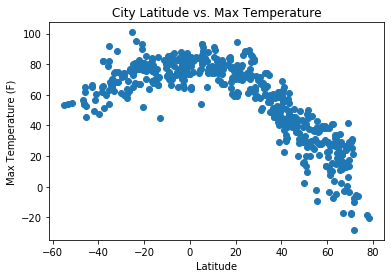

In [30]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
# Save the figure
# Show plot
scatlat = weather_data["Latitude"]
scattemp = weather_data["Max Temp"]

plt.scatter(scatlat,scattemp)
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('scatplotlatitudemaxtemp')
plt.show()

#This code is analyzing the max temperature of each city and latitude.

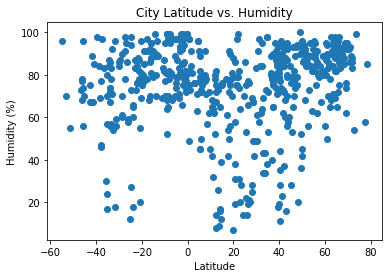

In [32]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
# Save the figure
# Show plot

#scatlat = weather_data["Latitude"]
scathum = weather_data["Humidity"]

plt.scatter(scatlat,scathum)
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('scatplotlatitudehumidity')
plt.show()

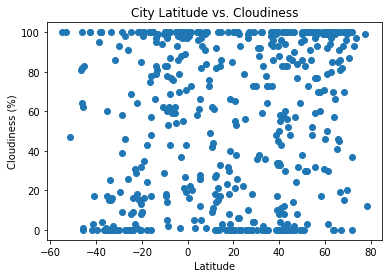

In [33]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
# Save the figure
# Show plot
#scatlat = weather_data["Latitude"]
scatcloud = weather_data["Cloudiness"]

plt.scatter(scatlat,scatcloud)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('scatplotlatitudecloudiness')
plt.show()

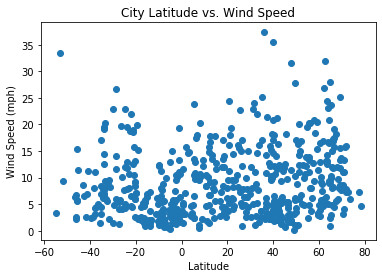

In [37]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
# Save the figure
# Show plot

#scatlat = weather_data["Latitude"]
scatwindsp = weather_data["Wind Speed"]

plt.scatter(scatlat,scatwindsp)
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('scatplotlatitudewindspeed')
plt.show()

In [38]:
# Create Northern and Southern Hemisphere DataFrames
northlat_df = weather_data.loc[weather_data["Latitude"] >= 0,:]
southlat_df = weather_data.loc[weather_data["Latitude"] < 0,:]

northlat_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Aklavik,68.2191,-135.0107,12.61,88,70,9.82,CA,1584511200
2,Ulaanbaatar,47.9077,106.8832,28.24,79,8,11.50,MN,1584511200
3,Buraidah,26.3260,43.9750,76.84,19,10,17.05,SA,1584511200
4,Saskylakh,71.9167,114.0833,-10.03,83,37,15.93,RU,1584511200
5,Khatanga,71.9667,102.5000,-7.69,86,100,7.20,RU,1584511200


In [40]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

The r-squared is: -0.8946869726629924


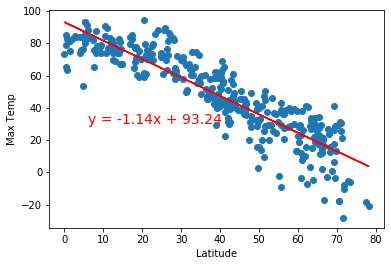

<Figure size 432x288 with 0 Axes>

In [41]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

plt.savefig('northerntemplat')

The r-squared is: 0.5426040608821873


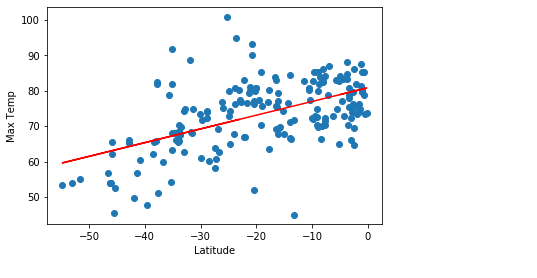

The high r value indicates a strong positive correlation between latitude and max temperature.


<Figure size 432x288 with 0 Axes>

In [42]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

plt.savefig('southerntemplat')

print("The high r value indicates a strong positive correlation between latitude and max temperature.")

The r-squared is: 0.35990907158624147


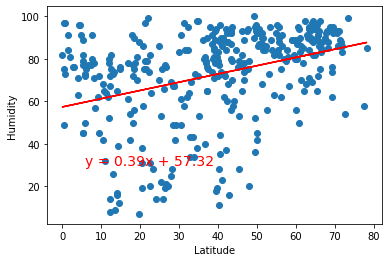

<Figure size 432x288 with 0 Axes>

In [43]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

plt.savefig('northernhumlat')

The r-squared is: 0.31878395146666605


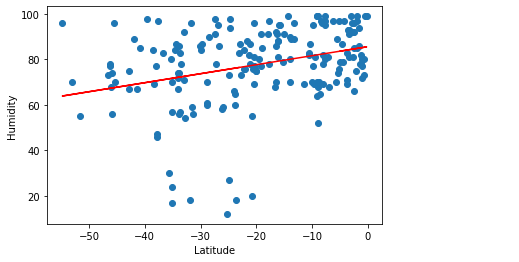

The low r values indicate a weak to no relationship between humidity and latitude.


<Figure size 432x288 with 0 Axes>

In [44]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

plt.savefig('southernhumlat')

print("The low r values indicate a weak to no relationship between humidity and latitude.")

The r-squared is: 0.2703295445569689


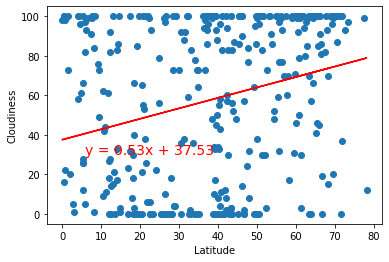

<Figure size 432x288 with 0 Axes>

In [45]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

plt.savefig('northerncloudlat')

The r-squared is: 0.3601607726828516


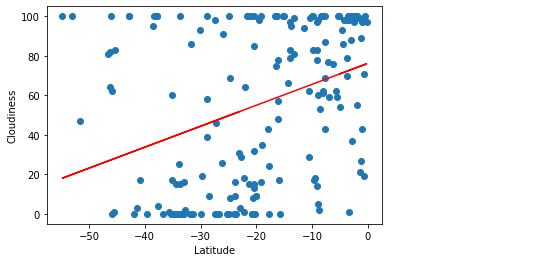

The low r values indicate a weak positive relationship between latitude and cloudiness.


<Figure size 432x288 with 0 Axes>

In [46]:

x_values = southlat_df["Latitude"]
y_values = southlat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

plt.savefig('southerncloudlat')

print("The low r values indicate a weak positive relationship between latitude and cloudiness.")

The r-squared is: 0.11718647149250273


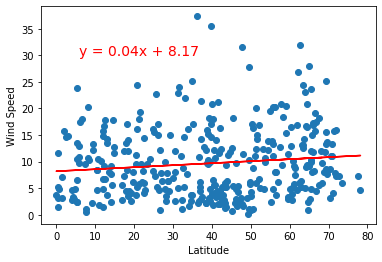

<Figure size 432x288 with 0 Axes>

In [47]:

x_values = northlat_df["Latitude"]
y_values = northlat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

plt.savefig('northernwindlat')

The r-squared is: -0.29015267079573837


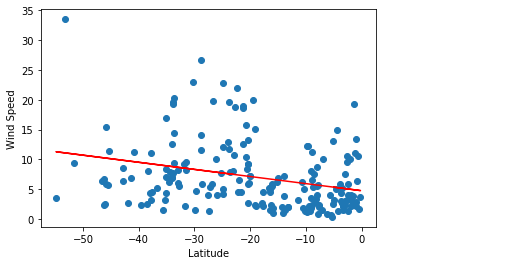

The low r values indicate that there is no real relationship between wind speed and latitude. The difference between the hemispheres doesn't seem to be significant enough to comment upon.


<Figure size 432x288 with 0 Axes>

In [48]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

plt.savefig('southernwindlat')

print("The low r values indicate that there is no real relationship between wind speed and latitude. The difference between the hemispheres doesn't seem to be significant enough to comment upon.")